In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_ollama import ChatOllama 
from langgraph.checkpoint.memory import InMemorySaver
import time

In [2]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str

In [10]:
def step_1(state: CrashState):
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) :
    print("⚠️ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState):
    return {"step3": "done"}

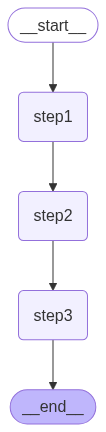

In [11]:
# 3. Build the graph
workflow = StateGraph(CrashState)

# Add nodes
workflow.add_node("step1", step_1)
workflow.add_node("step2", step_2)
workflow.add_node("step3", step_3)

# Add edges
workflow.add_edge(START, "step1")
workflow.add_edge("step1", "step2")
workflow.add_edge("step2", "step3")
workflow.add_edge("step3", END)

# 4. Compile with checkpoint saver for persistence
memory = InMemorySaver()
app = workflow.compile(checkpointer=memory)
app

In [12]:
# 5. Run the workflow
config1 = {"configurable": {"thread_id": "thread-1"}}

In [8]:


try:
    result = app.invoke(
        {"input": "Starting crash demo workflow", "step1": "", "step2": "", "step3": ""}, 
        config=config1
    )
    print("Final result:", result)
except KeyboardInterrupt:
    print("⚠️ Workflow interrupted! State saved to checkpoint.")
    print("You can resume from the last checkpoint.")

✅ Step 1 executed
⚠️ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
Final result: {'input': 'Starting crash demo workflow', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [7]:
list(app.get_state_history(config1))

[]

In [14]:

result = app.invoke(
        "input": "", 
        config=config1
)

print("Final result:", result)


SyntaxError: invalid syntax (2065114886.py, line 2)